# Importing Necessary Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Importing the dataset

In [42]:
df = pd.read_csv("dataframe_.csv")

In [43]:
df.shape

(1697, 2)

# Exploratory Data Analysis

In [44]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Here the maximum value is way bigger than the mean

## Removing the null values and handling the outliers

In [45]:
df.isnull().sum()

input     1
output    1
dtype: int64

We can see that there are some missing values in **x1** and **x2** feature. So let's impute these missing values.

In [46]:
df1 = df.fillna(df.median())
df1.isnull().sum()

input     0
output    0
dtype: int64

In [47]:
df1.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check if thers are any outliers using **boxplots**

<AxesSubplot: >

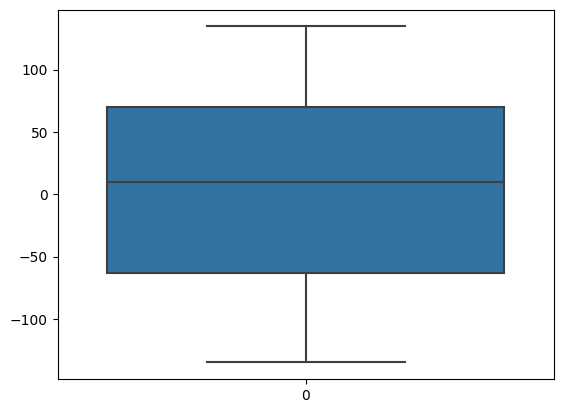

In [48]:
sns.boxplot(df1['input'])

<AxesSubplot: >

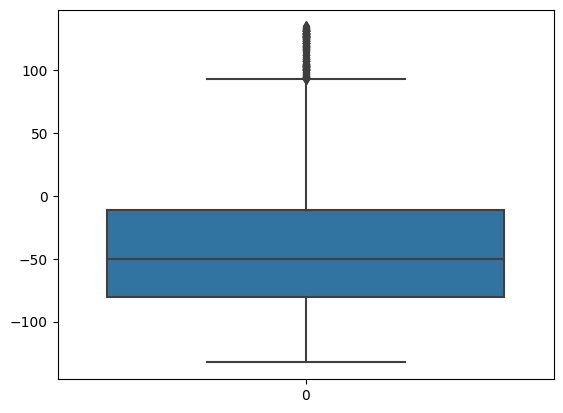

In [49]:
sns.boxplot(df1['output'])

Here we can see that there are outliers. So let us remove them.

In [50]:
df1['output'].quantile(0.999)

133.7931158

In [51]:
df2 = df1[df1['output'] <= 135]

In [52]:
df2.describe()

,input,output
count,1697.000000,1697.000000
mean,1.165257,-34.097671
std,78.982979,65.752922
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Let's check for outliers using boxplots

<AxesSubplot: >

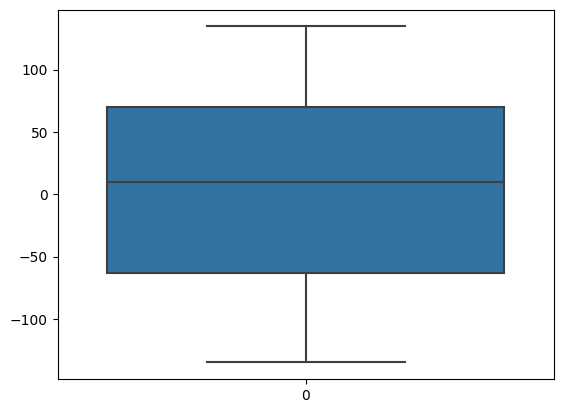

In [53]:
sns.boxplot(df2['input'])

<AxesSubplot: >

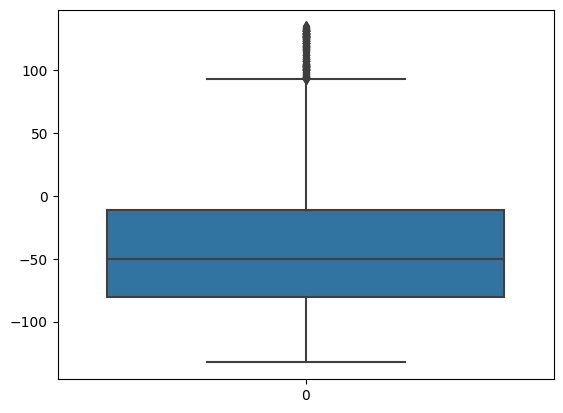

In [54]:
sns.boxplot(df2['output'])

we can see that there are no outliers in the data set

<AxesSubplot: xlabel='input', ylabel='output'>

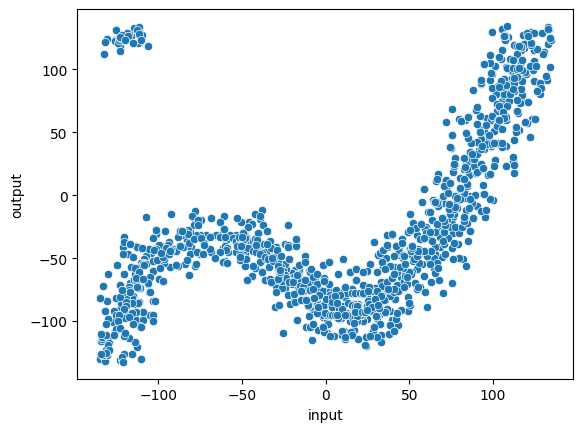

In [55]:
sns.scatterplot(x=df2['input'], y=df2['output'])

# Data preprocessing for Model training and evaluation

In [56]:
X = df2.drop(columns=['output'])
y = df2['output']

In [57]:
y.count

<bound method Series.count of 0      -130.572085
1      -129.938929
2      -130.141832
3      -125.760932
4      -112.785214
           ...    
1692    -76.380902
1693    -82.796934
1694    -87.000000
1695   -104.943052
1696   -101.726894
Name: output, Length: 1697, dtype: float64>

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [62]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_transformed)
score = lg.score(X_test, y_test)
print(score)
pred = lg.predict(X_test)
print(classification_report(y_test,pred))


c:\Users\sakshi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [ ]:
# Support Vector Machines with linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
score1 = svc.score(X_test, y_test)
print(score1)
pred = svc.predict(X_test)
print(classification_report(y_test,pred))

0.7374149659863946
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       412
           1       1.00      0.40      0.57       323

    accuracy                           0.74       735
   macro avg       0.84      0.70      0.69       735
weighted avg       0.82      0.74      0.71       735



In [ ]:
# support vector Machines with rbf kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)
score2 = svc_rbf.score(X_test, y_test)
print(score2)
pred = svc_rbf.predict(X_test)
print(classification_report(y_test,pred))

0.9442176870748299
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       412
           1       0.98      0.89      0.93       323

    accuracy                           0.94       735
   macro avg       0.95      0.94      0.94       735
weighted avg       0.95      0.94      0.94       735



In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,min_samples_split=30)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print(dt_score)
pred = dt.predict(X_test)
print(classification_report(y_test,pred))

0.9469387755102041
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       412
           1       0.95      0.93      0.94       323

    accuracy                           0.95       735
   macro avg       0.95      0.94      0.95       735
weighted avg       0.95      0.95      0.95       735



In [ ]:
# K Nearest Neighbours

# n_neighbours = 5 gives the best result
knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))

0.9537414965986395
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       412
           1       0.96      0.94      0.95       323

    accuracy                           0.95       735
   macro avg       0.95      0.95      0.95       735
weighted avg       0.95      0.95      0.95       735



## Evaluation
- Out of all the Five models, KNN scored the highest.
- Decision Tree and SVC with 'rbf' kernel are close.